# Let's dive in into Transformers Tools and Agents!


Transformers has the concept of tools and agents.

In short, it provides a natural language API on top of transformers: we define a set of curated tools and design an agent to interpret natural language and to use these tools. It is extensible by design; some relevant tools are curated, but the system can be extended easily to use any tool developed by the community.

In [3]:
#@title Setup
transformers_version = "v4.37.2" #@param ["main", "v4.29.0"] {allow-input: true}

print(f"Setting up everything with transformers version {transformers_version}")

!pip install huggingface_hub>=0.14.1 git+https://github.com/huggingface/transformers@$transformers_version -q diffusers accelerate datasets torch soundfile sentencepiece opencv-python openai

from huggingface_hub import notebook_login
notebook_login()

Setting up everything with transformers version v4.37.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.
ibis-framework 7.1.0 requires pyarrow<15,>=2, but you have pyarrow 15.0.0 which is incompatible.


In [4]:
!pip install openai==0.27

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.1/70.1 kB 3.3 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.12.0
    Uninstalling openai-1.12.0:
      Successfully uninstalled openai-1.12.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.


We'll start by instantiating an **agent**, which is a large language model (LLM). The OpenAI could be used for the best results, but fully open-source models such as StarCoder or OpenAssistant are also available. Here we use an OpenAI agent:

In [5]:
#@title Agent init
agent_name = "OpenAI (API Key)" #@param ["StarCoder (HF Token)", "OpenAssistant (HF Token)", "OpenAI (API Key)"]

import getpass

if agent_name == "StarCoder (HF Token)":
    from transformers.tools import HfAgent
    agent = HfAgent("https://api-inference.huggingface.co/models/bigcode/starcoder")
    print("StarCoder is initialized 💪")
elif agent_name == "OpenAssistant (HF Token)":
    from transformers.tools import HfAgent
    agent = HfAgent(url_endpoint="https://api-inference.huggingface.co/models/OpenAssistant/oasst-sft-4-pythia-12b-epoch-3.5")
    print("OpenAssistant is initialized 💪")
if agent_name == "OpenAI (API Key)":
    from transformers.tools import OpenAiAgent
    pswd = getpass.getpass('OpenAI API key:')
    agent = OpenAiAgent(model="davinci-002", api_key=pswd)
    print("OpenAI is initialized 💪")

OpenAI API key:··········


tool_config.json:   0%|          | 0.00/226 [00:00<?, ?B/s]

tool_config.json:   0%|          | 0.00/282 [00:00<?, ?B/s]

tool_config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

tool_config.json:   0%|          | 0.00/450 [00:00<?, ?B/s]

chat_prompt_template.txt:   0%|          | 0.00/2.83k [00:00<?, ?B/s]

run_prompt_template.txt:   0%|          | 0.00/2.72k [00:00<?, ?B/s]

OpenAI is initialized 💪



## Using the agent

Now, the **agent** is initialized! What can we do with it?

We have a world plenty of different objects and images. And we are able to describe all that we see in our native language. But what if we want to learn a foreign language? Let's use the full power of the **tools** of our **agent**.


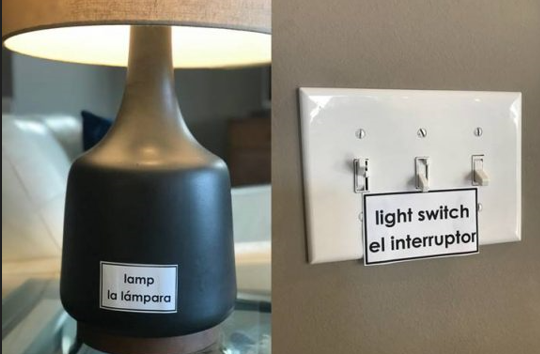




✅ Let's try to label/describe all things that you see in Spanish (or in a language of your choice)!

🔽 Here you can upload any custom image:

In [6]:
# function to upload the image.

def upload_files():
    from google.colab import files
    uploaded = files.upload()
    for k, v in uploaded.items():
      open(k, 'wb').write(v)
    return list(uploaded.keys())

uploaded_photos = upload_files()

Saving food_pic.webp to food_pic.webp


In [7]:
# let's read the uploaded image

from PIL import Image

# Read image
image = Image.open(uploaded_photos[0])

# Output Image
image.show()

Let's try to run the agent to generate captions for the uploaded image (in English).

If you'd like to ***hand objects*** (or previous results!) to the agent, you can do so by passing a variable directly, and mentioning between backticks the name of the variable passed. In our example, we are passing the uploaded image to the agent:

In [8]:
# Running agent for generating a caption for the image (in English)

description = agent.run("Generate a caption for the 'image'", image=image)
description

==Explanation from the agent==
I will use the following  tool: `image_captioner` to generate a caption for the image.


==Code generated by the agent==
caption = image_captioner(image)


==Result==


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
`get_default_device` is deprecated and will be replaced with `accelerate`'s `PartialState().default_device` in version 4.38 of 🤗 Transformers. 
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1133: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


'a plate of food with eggs, bread and a cup of coffee'

**Hint:** Agent's outputs like `==Explanation from the agent==` or `==Code generated by the agent==` are very useful for debugging and understanding what's going on under the hood.

🥑 Let's discover how to describe it in a language we want to learn!

❓ But first, how to know what languages are available? A translation tool is run by the [NLLB](https://huggingface.co/docs/transformers/main/model_doc/nllb) model. [Here](https://ai.facebook.com/research/no-language-left-behind/#200-languages-accordion) you can find the list of supported languages.

🔽 However, upon the check not all languages claimed as supported from the link above were working. You can use the list of supported languages below:

In [7]:
list_of_supported_languages = [
  'Afrikaans', 'Akan', 'Amharic', 'Armenian', 'Assamese', 'Asturian', 'Awadhi',
  'Balinese', 'Bambara', 'Bashkir', 'Basque', 'Belarusian', 'Bemba', 'Bengali',
  'Bhojpuri', 'Bosnian', 'Buginese', 'Bulgarian', 'Catalan', 'Cebuano',
  'Central Kurdish', 'Chhattisgarhi', 'Chokwe', 'Crimean Tatar', 'Croatian',
  'Czech', 'Danish', 'Dyula', 'Dzongkha', 'Esperanto', 'Estonian', 'Ewe',
  'Faroese', 'Fijian', 'Finnish', 'Fon', 'French', 'Friulian', 'Galician',
  'Ganda', 'Georgian', 'German', 'Greek', 'Guarani', 'Gujarati', 'Haitian Creole',
  'Hausa', 'Hebrew', 'Hindi', 'Hungarian', 'Icelandic', 'Igobo', 'Indonesian',
  'Irish', 'Italian', 'Japanese', 'Javanese', 'Kabyle', 'Kamba', 'Kannada',
  'Kazakh', 'Khmer', 'Kikuyu', 'Kimbundu', 'Kinyarwanda', 'Korean', 'Kyrgyz',
  'Lao', 'Latgalian', 'Ligurian', 'Limburgish', 'Lingala', 'Lithuanian',
  'Lombard', 'Luba-Kasai', 'Luxembourgish', 'Mizo', 'North Azerbaijani',
  'Scottish Gaelic', 'South Azerbaijani', 'Spanish', 'Swedish', 'Thai', 'Welsh']

We can run translation and voicing in a single run. For example, let's translate the image caption to **Spanish** and voice it:

In [9]:
agent.run(f"Translate 'text' to Spanish and read it loud", text=description)

==Explanation from the agent==
I will use the following  tools: `translator` to translate the text, then `text_reader` to read it out loud.


==Code generated by the agent==
translated_text = translator(text=text, src_lang="English", tgt_lang="Spanish")
print(f"Translated text: {translated_text}")
audio_translated_text = text_reader(translated_text)


==Result==


tokenizer_config.json:   0%|          | 0.00/564 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/4.85M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.3M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/3.55k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/846 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.46G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/189 [00:00<?, ?B/s]

`get_default_device` is deprecated and will be replaced with `accelerate`'s `PartialState().default_device` in version 4.38 of 🤗 Transformers. 


Translated text: un plato de comida con huevos, pan y una taza de café


preprocessor_config.json:   0%|          | 0.00/433 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/232 [00:00<?, ?B/s]

spm_char.model:   0%|          | 0.00/238k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/40.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/234 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.06k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/585M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/50.7M [00:00<?, ?B/s]

`get_default_device` is deprecated and will be replaced with `accelerate`'s `PartialState().default_device` in version 4.38 of 🤗 Transformers. 


Generating validation split:   0%|          | 0/7931 [00:00<?, ? examples/s]

Alternetively, we can run translation and vocing step by step:

In [10]:
translated_text = agent.run(f"Translate 'text' to Spanish and return translated text", text=description)

==Explanation from the agent==
I will use the following  tools: `translator` to translate the text, then `text_downloader` to download the translated text.


==Code generated by the agent==
translated_text = translator(text=text, src_lang="English", tgt_lang="Spanish")
print(f"Translated text: {translated_text}")


==Result==
Translated text: un plato de comida con huevos, pan y una taza de café


In [11]:
# Running agent for generating an audio for translated caption

audio = agent.run("Read out loud the 'translated_text' in Spanish", translated_text=description)
audio

==Explanation from the agent==
I will use the following  tools: `translator` to translate the text into Spanish, then `text_reader` to read it out loud.


==Code generated by the agent==
translated_text = translator(text=translated_text, src_lang="English", tgt_lang="Spanish")
print(f"Spanish: {translated_text}")
audio_spanish = text_reader(translated_text)


==Result==
Spanish: un plato de comida con huevos, pan y una taza de café


🤔 Hm... It sounds a bit artificial, it's unlikely that a native speaker would pronounce it like this.

🔥 Let's try to build a custom tool for voicing!

## Adding new tools: language voicer

We'll add a Google Text-to-Speech tool to read out loud the text in a given language.

We can do this with the following code:

In [2]:
# install all required packages

!pip install gtts
!pip install langcodes
!pip install language_data

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 49.9 MB/s eta 0:00:00


In [12]:
from gtts import gTTS
from IPython.display import Audio

# Text voicing function

def text_to_speech(text, lang):
    tts = gTTS(text, lang=lang)
    tts.save('output.mp3')
    return Audio('output.mp3', autoplay=True)


Let's create a tool that can be used by our agent!

All tools depend on the superclass `Tool` that holds the main attributes necessary. We'll create a class that inherits from it:

In [13]:
from transformers import Tool

class VoicingInDifferentLanguages(Tool):
    pass

This class has a few needs:

- An **attribute name** that corresponds to the name of the tool itself. To be in tune with other tools which have a performative name, we'll name it *google_voicing_multiple_languages*.
- An **attribute description**, which will be used to populate the prompt of the agent.
- **Inputs and outputs** attributes. Defining this will help the python interpreter make educated choices about types, and will allow for a gradio-demo to be spawned when we push our tool to the Hub. They're both a list of expected values, which can be text, image, or audio.
- A __call__ method which contains the inference code. This is the code we've played with above!

Here’s what our class looks like now:

In [14]:
from transformers import Tool
from huggingface_hub import list_models


# Custom text voicing tool

class VoicingInDifferentLanguages(Tool):
    name = "google_voicing_multiple_languages"
    description = ("This is a tool that can voice a word or a phrase in a given language. It takes a text and language as input, and returns the audio.")

    inputs = ["text", "text"]
    outputs = ["audio"]

    def __call__(self, text, language):
        return text_to_speech(text, language)

We can simply use and test the tool directly:

*(Note: the gtts function needs a language code to work correctly. We will handle converting the language name to the language code later on)*

In [15]:
tool = VoicingInDifferentLanguages()

tool(text='comida', language='es')

In order to pass the tool to the agent, it is recommended to instantiate the agent with the tools directly:

In [16]:
from transformers.tools import OpenAiAgent
pswd = getpass.getpass('OpenAI API key:')
agent = OpenAiAgent(model="davinci-002", api_key=pswd, additional_tools=[tool])

OpenAI API key:··········


🚀 Let's try to have the agent use it!

In [18]:
# Handling the language name to language code convertion

import langcodes

target_language_code = str(langcodes.find('Spanish'))
target_language_code

'es'

In [19]:
# Running the sounded like a native speaker voicing

agent.run("Get voicing of 'text' in 'language'", text=translated_text, language=target_language_code)

==Explanation from the agent==
I will use the following  tool: `google_voicing_multiple_languages` to get the voicing of the text in the language.


==Code generated by the agent==
voiced_text = google_voicing_multiple_languages(text=text, language=language)


==Result==


Success 🎉
The tool was used to generate a sounded like a native speaker voicing.


🙏 Thanks for following through with the notebook

▶ To learn more: https://huggingface.co/docs/transformers/main/transformers_agents

---

